# TIME SERIES FORECASTING

***Hey so first things first, Thankyou for opening my kernel. Disclaimer : I am still learning but I have tried to jot down whatever I have understood in this kernel. Ps - Tag along till the end, you'll surely enjoy my commentary if not the code AND please upvote if you like this!!!***

 I will take you through time series data its basically a collection of data points over a time interval.

Steps : 
1. Loading and Indexing the Dataset
2. Checking if the data is stationary or not ( It should have constant Mean - Variance - Std)
3. Converting data into stationary 
4. Creating the ARIMA model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passengers/AirPassengers.csv


Loading and Reading the Dataset

In [2]:
df = pd.read_csv('../input/air-passengers/AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


The dataset is time series having columns Months and No. of Passengers. Now we will play with the basic pandas function to know more about the dataset.

In [4]:
df.shape

(144, 2)

HURRAY!! No missing values is just the best thing which happened to me today

In [5]:
df.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
from datetime import datetime

Converting date string to datetime data type

In [8]:
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)


As you can see, I have changed the data type now

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


Setting the index as date so that we can access and traverse values easily, do a substring search and brownie points to the fact that it can help us to visualise easily.

In [10]:
index = df.set_index('Month',inplace=False)

In [11]:
index.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Visualising the Passengers

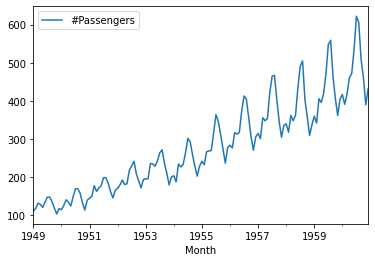

In [12]:
index.plot()

Typing "#Passengers" seems really annoying so I'll just rename it, Hehe.

In [13]:
index.rename(columns={'#Passengers':'Passengers'},inplace=True)

# Checking if the data is stationary

So basically you can adopt any of these ways
-> plot the rooling mean or rolling std to check if the change in mean is constant or not 
-> ADCF Test
-> KPSS Test

For a better explanation and your clarity, I will skim you through each of them..

In [14]:
simple_ma = index['Passengers'].rolling(window=12).mean()
simple_std = index['Passengers'].rolling(window=12).std()

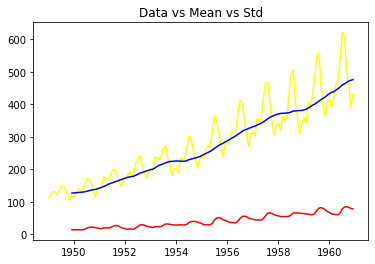

In [15]:
plt.title('Data vs Mean vs Std')
plt.plot(index,color='yellow')
plt.plot(simple_ma, color='blue')
plt.plot(simple_std,color='red')

Trend in the dataset can evidently be seen

Conducting the ADCF ie Augmented Dickey Fuller Test. Having the Null Hypothesis to be Time Series is Non Stationary

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
df_test = adfuller(index['Passengers'],autolag='AIC')
df_test

(0.8153688792060468,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

Output shows the follwoing : Test Statistic 0.81 p-value 0.99 #Lags Used 13 No. of Observation Used 130 followed by Critical Values at various percentages.

**For Data to be stationary p value should be < 0.05 and critical values should be close to Test Statistics. Therefore, ADCF test concludes that data is NOT Stationary**

Still y'all have a doubt whether Data is stationary or not? Don't worry. Just for your validation, I will conduct another test! That being the KPSS Test

In [18]:
from statsmodels.tsa.stattools import kpss

In [19]:
kpss_test = kpss(index['Passengers'],'ct')
kpss_test

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


(0.16273657405822856,
 0.0360528549514762,
 14,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

Output shows the follwoing : Test Statistic 0.16 p-value 0.03 #Lags Used 14 followed by Critical Values at various percentages.

For Data to not be stationary p value should be < 0.05 and Null Hypothesis should be rejected. Therefore, KPSS test also concludes that data is NOT Stationary



# Transforming Data to Achieve Stationarity

In [20]:
index_log = np.log(index)
ma_log = index_log.rolling(window=11).mean()
std_log = index_log.rolling(window=12).std()

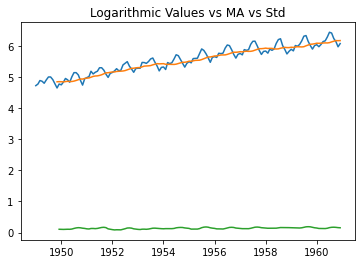

In [21]:
plt.title("Logarithmic Values vs MA vs Std")
plt.plot(index_log)
plt.plot(ma_log)
plt.plot(std_log)

This seems to be sligtly better than the precious case. So hand on there guys. We're getting close

In [22]:
index_new = index_log - ma_log
index_new.dropna(inplace=True)

In [23]:
ma_new = index_new.rolling(window=11).mean()
std_new = index_new.rolling(window=12).std()

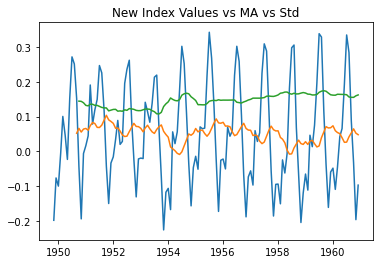

In [24]:
plt.title("New Index Values vs MA vs Std")
plt.plot(index_new)
plt.plot(ma_new)
plt.plot(std_new)

In [25]:
df_test_new = adfuller(index_new['Passengers'],autolag='AIC')
df_test_new

(-3.214139634595369,
 0.019180672353057808,
 13,
 120,
 {'1%': -3.486055829282407,
  '5%': -2.8859430324074076,
  '10%': -2.5797850694444446},
 -444.9677956369542)

After concluding the results from ADFC TEST, p-value has reduced from 0.99 to 0.019 AND critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic. Thus,we can say that our given series is stationary.

# ARIMA MODEL CREATION

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
model = ARIMA(index_log , order = (2,1,2))
results_ARIMA = model.fit(disp=-1)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [28]:
predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64

Link for part 2 https://www.kaggle.com/harshsinha1234/time-series-arima-model-simplified

In [29]:
model2 = ARIMA(index_log , order = (2,1,0))
results_ARIMA2 = model2.fit(disp=-1)
model3 = ARIMA(index_log , order = (0,1,2))
results_ARIMA3 = model3.fit(disp=-1)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [30]:
predictions2 = pd.Series(results_ARIMA2.fittedvalues, copy=True)
predictions2.head()

Month
1949-02-01    0.009600
1949-03-01    0.018167
1949-04-01    0.026435
1949-05-01   -0.015768
1949-06-01   -0.002144
dtype: float64

In [31]:
predictions3 = pd.Series(results_ARIMA3.fittedvalues, copy=True)
predictions3.head()

Month
1949-02-01    0.009631
1949-03-01    0.014526
1949-04-01    0.011819
1949-05-01   -0.025744
1949-06-01    0.013877
dtype: float64